### CUSTOMER ATTRITION PREDICTION USING AN ARTIFICIAL NEURAL NETWORK

### Model prediction of how likely a customer exits a bank

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Downloads\\archive (1)\\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
# Dropping columns that do not help in creating the model
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9749,533,France,Female,35,8,0.00,2,1,1,187900.12,0
2540,550,Germany,Female,45,8,111257.59,1,0,0,97623.42,1
2067,744,France,Male,31,9,120718.28,1,1,1,58961.49,0


In [6]:
exited_no = df[df.Exited==0].Tenure
exited_yes = df[df.Exited==1].Tenure

## Data Visualization

### 1. Customer attrition based on their tenure

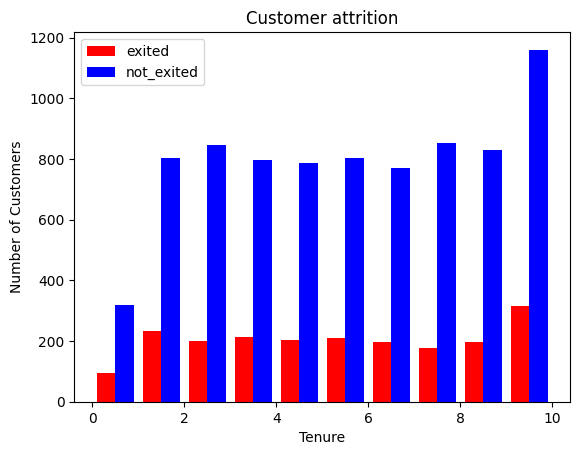

In [7]:
plt.hist([exited_yes,exited_no],color=['red','blue'],label=['exited','not_exited'])

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer attrition')

plt.legend()
plt.show()

### 2. Customer attrition based on their credit score

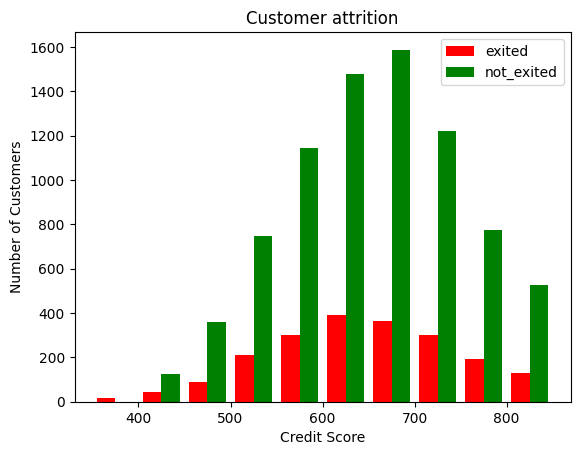

In [8]:
exited_no = df[df.Exited==0].CreditScore
exited_yes = df[df.Exited==1].CreditScore

plt.hist([exited_yes,exited_no],color=['red','green'],label=['exited','not_exited'])

plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Customer attrition')

plt.legend()
plt.show()

### 3. Customer attrition based on Geography

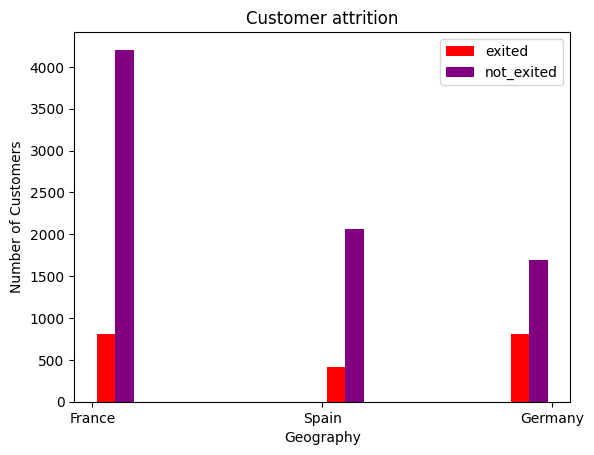

In [9]:
exited_no = df[df.Exited==0].Geography
exited_yes = df[df.Exited==1].Geography

plt.hist([exited_yes,exited_no],color=['red','purple'],label=['exited','not_exited'])
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Customer attrition')

plt.legend()
plt.show()

### 4. Customer attrition based on Estimated Salary

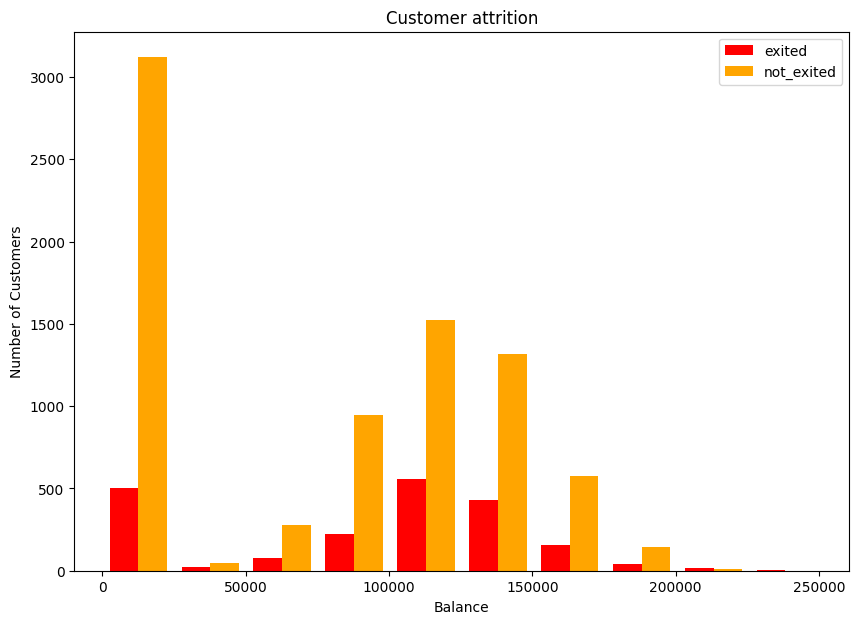

In [10]:
exited_no = df[df.Exited==0].Balance
exited_yes = df[df.Exited==1].Balance

plt.figure(figsize=(10,7))
plt.hist([exited_yes,exited_no],color=['red','orange'],label=['exited','not_exited'])
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Customer attrition')

plt.legend()
plt.show()

## Data cleaning and Preprocessing

In [11]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5605,619,France,Male,58,5,152199.33,1,1,1,86022.09,0
1826,569,Germany,Male,25,9,173459.45,2,1,1,44381.06,0
2154,606,Germany,Male,65,10,126306.64,3,0,0,7861.68,1
9357,418,France,Female,46,9,0.00,1,1,1,81014.50,1


### 1. Converting the string columns to float

In [13]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})

C:\Users\Joepr\AppData\Local\Temp\ipykernel_4820\1879725160.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})


In [14]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [15]:
# converting the column by one hot encoding
df = pd.get_dummies(data=df,columns=['Geography'],dtype='b')

In [16]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

### 2. Scaling

In [17]:
columns_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1993,0.948,1,0.567568,0.8,0.535078,0.666667,0,0,0.765246,1,0,1,0
6682,0.580,1,0.148649,0.5,0.785977,0.333333,1,0,0.707278,0,0,0,1
58,0.322,0,0.648649,0.4,0.000000,0.000000,1,0,0.008158,1,0,0,1


### 3. Handling Imbalance

In [19]:
exited_0 = df[df.Exited==0]
exited_1 = df[df.Exited==1]
exited_0.shape, exited_1.shape

((7963, 13), (2037, 13))

In [20]:
X = df.drop('Exited',axis=1)
y = df.Exited

In [21]:
# using smote to get synthetic copies of the minor dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_s, y_s = smote.fit_resample(X,y)
y_s.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

## Model Training and predictions

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s,y_s,test_size=0.2,random_state=5,stratify=y_s)

In [23]:
y_train.value_counts(), y_test.value_counts()

(Exited
 0    6370
 1    6370
 Name: count, dtype: int64,
 Exited
 1    1593
 0    1593
 Name: count, dtype: int64)

In [24]:
X_train.shape, X_test.shape

((12740, 12), (3186, 12))

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(24,activation='relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=200)

C:\Users\Joepr\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5971 - loss: 0.6662
Epoch 2/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6727 - loss: 0.5983
Epoch 3/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7053 - loss: 0.5639
Epoch 4/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7220 - loss: 0.5497
Epoch 5/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7296 - loss: 0.5360
Epoch 6/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7388 - loss: 0.5293
Epoch 7/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7534 - loss: 0.5072
Epoch 8/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7615 - loss: 0.4846
Epoch 9/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7686 - loss: 0.4782
Epoch 10/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7754 - loss: 0.4642
Epoch 11/200
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7781 - loss: 0.4553
Epoch 12/200
399/399 ━━━━━━━━━━━━━━━━━

In [27]:
model.evaluate(X_test,y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8201 - loss: 0.4015


[0.41170623898506165, 0.8129315972328186]

In [28]:
y_predicted = model.predict(X_test)
y_predicted[:6]

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[0.38495794],
       [0.9874151 ],
       [0.85046077],
       [0.9806463 ],
       [0.93653524],
       [0.5897018 ]], dtype=float32)

In [29]:
y_pred = []
for value in y_predicted:
    if value > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
y_pred[:10]

[0, 1, 1, 1, 1, 1, 1, 0, 1, 0]

In [31]:
y_test[:10]

1095     1
8363     1
13789    1
1676     1
10533    1
898      1
11747    1
4141     0
12854    1
6453     0
Name: Exited, dtype: int64

Text(50.722222222222214, 0.5, 'Truth')

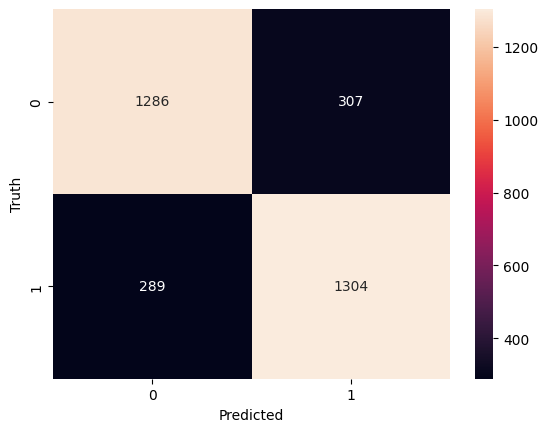

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test,y_pred)

sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1593
           1       0.81      0.82      0.81      1593

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

